In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

max_speed = 25.0
max_num_vehicles = 11

num_samples = 1000000  # Number of samples for the Monte Carlo simulation

# Define the range for WA, WB, and WC
wa_range = np.arange(0.1, 1.01, 0.01)
wb_range = np.arange(0.1, 1.01, 0.01)

utilities = []  # To store utility values for histogram
scatter_data = []  # To store data for scatter plot

best_utility = float('-inf')
best_wa = 0.0
best_wb = 0.0
best_wc = 0.0

for wa in wa_range:
    for wb in wb_range:
        wc = 1.0 - wa - wb  # Calculate WC based on the condition WA + WB + WC = 1

        if wc > 0:  # Only proceed if WC is non-negative
            total_utility = 0.0
            utility_values = []

            for _ in range(num_samples):
                min_speed = random.uniform(0.0, 25.01)
                avg_speed = random.uniform(min_speed, 25.01)
                num_vehicles = random.randint(0, 12)

                # Add random error to the utility calculation using a normal distribution
                utility = wa * (min_speed / max_speed) + wb * (avg_speed / max_speed) + wc * (
                        (max_num_vehicles - num_vehicles) / max_num_vehicles)
                utility += np.random.normal(loc=0.0, scale=0.1)  # Adjust the scale to control the amount of error

                total_utility += utility
                utility_values.append(utility)

            average_utility = total_utility / num_samples
            #print("For wa, wb : ",wa, wb, average_utility)
            utilities.extend(utility_values)
            scatter_data.append([wa, wb, average_utility])

            if average_utility > best_utility:
                best_utility = average_utility
                best_wa = wa
                best_wb = wb
                best_wc = wc

# Histogram of Utility Values
plt.hist(utilities, bins=30, edgecolor='black')
plt.xlabel('Utility')
plt.ylabel('Frequency')
plt.title('Distribution of Utility Values')
plt.show()

# Scatter Plot of Parameter Values and Utility
scatter_data = np.array(scatter_data)
plt.scatter(scatter_data[:, 0], scatter_data[:, 1], c=scatter_data[:, 2], cmap='viridis')
plt.xlabel('WA')
plt.ylabel('WB')
plt.title('Parameter Values vs Utility')
plt.colorbar(label='Utility')
plt.show()

# Summary Statistics
mean_utility = np.mean(utilities)
std_utility = np.std(utilities)
min_utility = np.min(utilities)
max_utility = np.max(utilities)

print("Summary Statistics:")
print("Mean Utility:", mean_utility)
print("Standard Deviation:", std_utility)
print("Minimum Utility:", min_utility)
print("Maximum Utility:", max_utility)

# Box Plot of Utility for Different Parameter Combinations
plt.boxplot(scatter_data[:, 2], labels=['Utility'])
plt.xlabel('Parameters')
plt.ylabel('Utility')
plt.title('Box Plot of Utility for Different Parameter Combinations')
plt.show()

print("Best Utility:", best_utility)
print("Best WA:", best_wa)
print("Best WB:", best_wb)
print("Best WC:", best_wc)


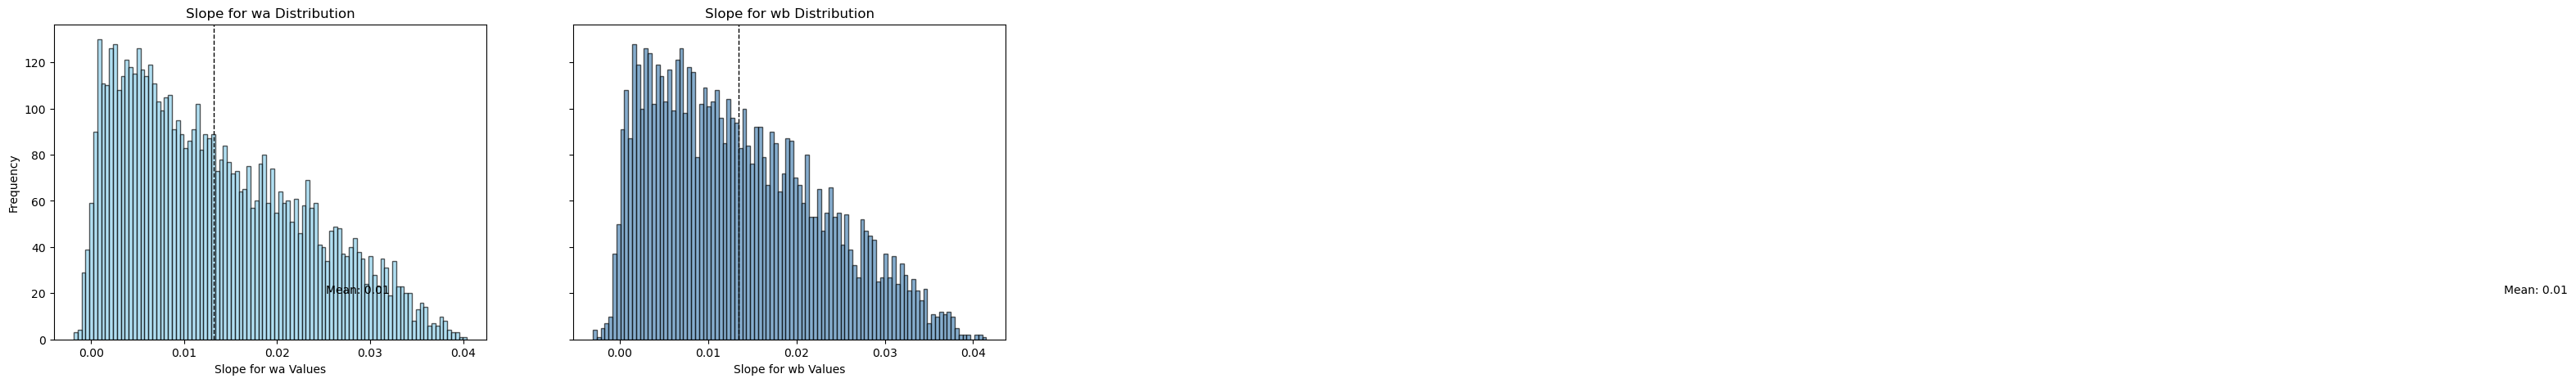

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

wa = 0.4
wb = 0.4
wc = 0.2

min_speed = 0
max_speed = 25
max_num_vehicles = 11

num_iterations = 6000

num_values = 500  # Number of values to generate for each iteration

incpt = []
sl_wa = []
sl_wb = []

for _ in range(num_iterations):
    weights = np.random.dirichlet(np.ones(3), size=1).flatten()
    wa = weights[0]
    wb = weights[1]
    wc = weights[2]

    min_speed_vals = np.random.uniform(min_speed, max_speed, num_values)
    avg_speed_vals = np.random.uniform(min_speed_vals, max_speed, num_values)
    num_vehicles_vals = np.random.randint(0, max_num_vehicles + 1, num_values)

    utilities = wa * (min_speed_vals / max_speed) + wb * (avg_speed_vals / max_speed) + (1-wa-wb) * (
            (max_num_vehicles - num_vehicles_vals) / max_num_vehicles)

    errors = np.random.normal(0, 0.1, num_values)
    utilities += errors

    X = np.column_stack((min_speed_vals, avg_speed_vals, (max_num_vehicles - num_vehicles_vals) / max_num_vehicles))
    Y = utilities.reshape(-1, 1)

    reg = LinearRegression().fit(X, Y)

    incpt.append(reg.intercept_)
    sl_wa.append(reg.coef_[0][0])
    sl_wb.append(reg.coef_[0][1])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.hist(sl_wa, bins=100, color='skyblue', edgecolor='k', alpha=0.65)
ax2.hist(sl_wb, bins=100, color='steelblue', edgecolor='k', alpha=0.65)
ax1.axvline(np.array(sl_wa).mean(), color='k', linestyle='dashed', linewidth=1)
ax2.axvline(np.array(sl_wb).mean(), color='k', linestyle='dashed', linewidth=1)
_, y_max = ax1.get_ylim()
ax1.set_title('Slope for wa Distribution')
ax1.set_xlabel('Slope for wa Values')
ax1.set_ylabel('Frequency')
ax2.set_title('Slope for wb Distribution')
ax2.set_xlabel('Slope for wb Values')
ax1.text(x=np.array(sl_wa).mean() + 0.012, y=20, s='Mean: {:.2f}'.format(np.array(sl_wa).mean()))
ax2.text(x=np.array(sl_wb).mean() + 0.2, y=20, s='Mean: {:.2f}'.format(np.array(sl_wb).mean()))
plt.show()


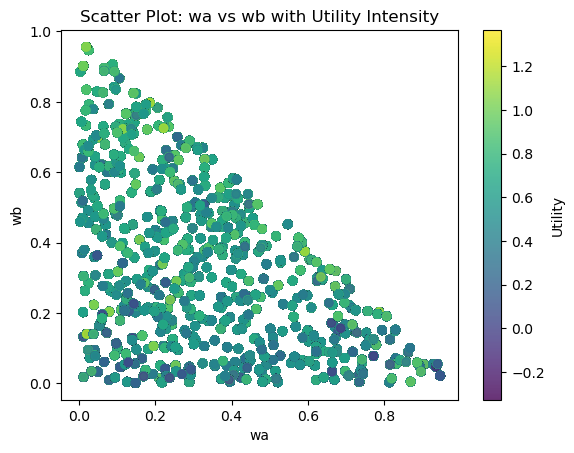

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

wa = 0.4
wb = 0.4
wc = 0.2

min_speed = 0
max_speed = 25
max_num_vehicles = 11

num_iterations = 600
num_values = 500

wa_values = []
wb_values = []
utilities = []

for _ in range(num_iterations):
    weights = np.random.dirichlet(np.ones(3), size=1).flatten()
    wa = weights[0]
    wb = weights[1]
    wc = weights[2]

    min_speed_vals = np.random.uniform(min_speed, max_speed, num_values)
    avg_speed_vals = np.random.uniform(min_speed_vals, max_speed, num_values)
    num_vehicles_vals = np.random.randint(0, max_num_vehicles + 1, num_values)

    utility = wa * (min_speed_vals / max_speed) + wb * (avg_speed_vals / max_speed) + (1 - wa - wb) * (
            (max_num_vehicles - num_vehicles_vals) / max_num_vehicles)

    errors = np.random.normal(0, 0.1, num_values)
    utility += errors

    wa_values.extend([wa] * num_values)
    wb_values.extend([wb] * num_values)
    utilities.extend(utility)

# Plotting the scatter plot
plt.scatter(wa_values, wb_values, c=utilities, cmap='viridis', alpha=0.8)
plt.colorbar(label='Utility')
plt.xlabel('wa')
plt.ylabel('wb')
plt.title('Scatter Plot: wa vs wb with Utility Intensity')
plt.show()


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

min_speed = 0
max_speed = 25
max_num_vehicles = 11

num_iterations = 600
num_values = 500

wa_values = []
wb_values = []
utilities = []

for _ in range(num_iterations):
    weights = np.random.dirichlet(np.ones(3), size=1).flatten()
    wa = weights[0]
    wb = weights[1]
    wc = 1 - wa - wb  # Calculate wc based on wa and wb

    min_speed_vals = np.random.uniform(min_speed, max_speed, num_values)
    avg_speed_vals = np.random.uniform(min_speed_vals, max_speed, num_values)
    num_vehicles_vals = np.random.randint(0, max_num_vehicles + 1, num_values)

    utility = wa * (min_speed_vals / max_speed) + wb * (avg_speed_vals / max_speed) + wc * (
            (max_num_vehicles - num_vehicles_vals) / max_num_vehicles)

    errors = np.random.normal(0, 0.1, num_values)
    utility += errors

    wa_values.extend([wa] * num_values)
    wb_values.extend([wb] * num_values)
    utilities.extend(utility)

# Perform linear regression
X = np.column_stack((wa_values, wb_values))
y = utilities

regressor = LinearRegression()
regressor.fit(X, y)

# Retrieve the coefficients (optimal values)
wa_optimal = regressor.coef_[0]
wb_optimal = regressor.coef_[1]
wc_optimal = 1 - wa_optimal - wb_optimal

print("Optimal values:")
print("wa:", wa_optimal)
print("wb:", wb_optimal)
print("wc:", wc_optimal)


Optimal values:
wa: -0.0013634323072903452
wb: 0.2543935837808788
wc: 0.7469698485264116


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

min_speed = 0
max_speed = 25
max_num_vehicles = 11

num_iterations = 6000
num_values = 500

wa_values = []
wb_values = []
utilities = []

for _ in range(num_iterations):
    while True:
        weights = np.random.dirichlet(np.ones(3), size=1).flatten()
        wa = np.clip(weights[0], 0, 1)
        wb = np.clip(weights[1], 0, 1)
        wc = 1 - wa - wb  # Calculate wc based on wa and wb

        if wa > 0 and wb > 0 and wc > 0:
            break

    min_speed_vals = np.random.uniform(min_speed, max_speed, num_values)
    avg_speed_vals = np.random.uniform(min_speed_vals, max_speed, num_values)
    num_vehicles_vals = np.random.randint(0, max_num_vehicles + 1, num_values)

    utility = wa * (min_speed_vals / max_speed) + wb * (avg_speed_vals / max_speed) + wc * (
            (max_num_vehicles - num_vehicles_vals) / max_num_vehicles)

    errors = np.random.normal(0, 0.1, num_values)
    utility += errors

    wa_values.extend([wa] * num_values)
    wb_values.extend([wb] * num_values)
    utilities.extend(utility)

# Perform linear regression
X = np.column_stack((wa_values, wb_values))
y = utilities

regressor = LinearRegression()
regressor.fit(X, y)

# Retrieve the coefficients (optimal values)
wa_optimal = regressor.coef_[0]
wb_optimal = regressor.coef_[1]
wc_optimal = 1 - wa_optimal - wb_optimal

print("Optimal values:")
print("wa:", wa_optimal)
print("wb:", wb_optimal)
print("wc:", wc_optimal)


Optimal values:
wa: -0.0004955809989496265
wb: 0.25069444071682256
wc: 0.749801140282127


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

min_speed = 5
max_speed = 25
max_num_vehicles = 11

num_iterations = 6000
num_values = 500

wa_values = []
wb_values = []
utilities = []

true_wa = 0.4
true_wb = 0.4
true_wc = 0.2

for _ in range(num_iterations):
    while True:
        wa = np.random.uniform(0, 1)
        wb = np.random.uniform(0, 1)
        wc = 1 - wa - wb

        if wa > 0.1 and wb > 0 and wc > 0:
            break

    min_speed_vals = np.random.uniform(min_speed, max_speed, num_values)
    avg_speed_vals = np.random.uniform(min_speed_vals, max_speed, num_values)
    num_vehicles_vals = np.random.randint(0, max_num_vehicles + 1, num_values)

    utility = wa * (min_speed_vals / max_speed) + wb * (avg_speed_vals / max_speed) + wc * (
            (max_num_vehicles - num_vehicles_vals) / max_num_vehicles)

    errors = np.random.normal(0, 0.1, num_values)
    utility += errors

    wa_values.extend([wa] * num_values)
    wb_values.extend([wb] * num_values)
    utilities.extend(utility)

# Perform linear regression
X = np.column_stack((wa_values, wb_values))
y = utilities

regressor = LinearRegression()
regressor.fit(X, y)

# Retrieve the coefficients (optimal values)
wa_optimal = regressor.coef_[0]
wb_optimal = regressor.coef_[1]
wc_optimal = 1 - wa_optimal - wb_optimal

print("True values:")
print("wa:", true_wa)
print("wb:", true_wb)
print("wc:", true_wc)
print("\nOptimal values:")
print("wa:", wa_optimal)
print("wb:", wb_optimal)
print("wc:", wc_optimal)


True values:
wa: 0.4
wb: 0.4
wc: 0.2

Optimal values:
wa: 0.10033353654152417
wb: 0.30050274003072536
wc: 0.5991637234277505


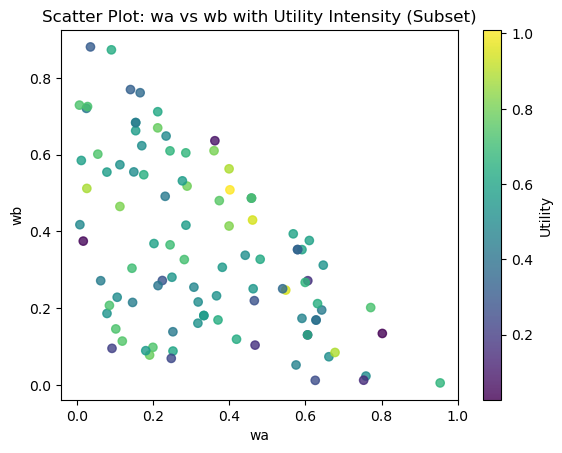

In [37]:
import numpy as np
import matplotlib.pyplot as plt

min_speed = 0
max_speed = 25
max_num_vehicles = 11

num_iterations = 600
num_values = 500

wa_values = []
wb_values = []
utilities = []

for _ in range(num_iterations):
    weights = np.random.dirichlet(np.ones(3), size=1).flatten()
    wa = weights[0]
    wb = weights[1]
    wc = 1 - wa - wb  # Calculate wc to satisfy wa + wb + wc = 1
    min_speed_vals = np.random.uniform(min_speed, max_speed, num_values)
    avg_speed_vals = np.random.uniform(min_speed_vals, max_speed, num_values)
    num_vehicles_vals = np.random.randint(0, max_num_vehicles + 1, num_values)

    utility = wa * (min_speed_vals / max_speed) + wb * (avg_speed_vals / max_speed) + wc * (
            (max_num_vehicles - num_vehicles_vals) / max_num_vehicles)

    errors = np.random.normal(0, 0.1, num_values)
    utility += errors

    wa_values.extend([wa] * num_values)
    wb_values.extend([wb] * num_values)
    utilities.extend(utility)

# Selecting a subset of points
subset_size = 100  # Specify the desired number of points in the subset
indices = np.random.choice(len(wa_values), size=subset_size, replace=False)

wa_subset = [wa_values[i] for i in indices]
wb_subset = [wb_values[i] for i in indices]
utilities_subset = [utilities[i] for i in indices]

# Plotting the scatter plot with the subset of points
plt.scatter(wa_subset, wb_subset, c=utilities_subset, cmap='viridis', alpha=0.8)
plt.colorbar(label='Utility')
plt.xlabel('wa')
plt.ylabel('wb')
plt.title('Scatter Plot: wa vs wb with Utility Intensity (Subset)')
plt.show()


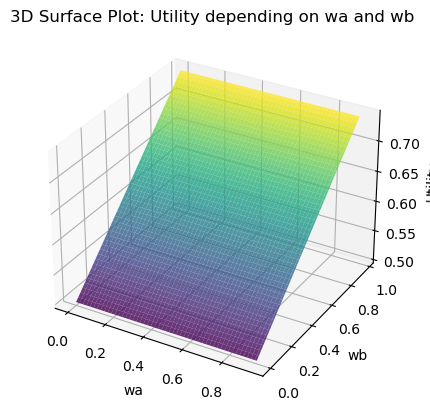

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor

# Combine wa_values, wb_values, and utilities into a single array
data = np.column_stack((wa_values, wb_values, utilities))

# Fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(data[:, :2], data[:, 2])

# Generate data for the surface plot
wa_range = np.linspace(min(wa_values), max(wa_values), 100)
wb_range = np.linspace(min(wb_values), max(wb_values), 100)
wa_mesh, wb_mesh = np.meshgrid(wa_range, wb_range)
utility_mesh = regression_model.predict(np.column_stack((wa_mesh.ravel(), wb_mesh.ravel())))
utility_mesh = utility_mesh.reshape(wa_mesh.shape)

# Plotting the 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(wa_mesh, wb_mesh, utility_mesh, cmap='viridis', alpha=0.8)

ax.set_xlabel('wa')
ax.set_ylabel('wb')
ax.set_zlabel('Utility')
ax.set_title('3D Surface Plot: Utility depending on wa and wb')

# Add interactivity to the plot
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)

def onclick(event):
    if event.inaxes == ax:
        wa_val = event.xdata
        wb_val = event.ydata
        utility_val = regression_model.predict([[wa_val, wb_val]])[0]
        print(f"Clicked: wa={wa_val:.2f}, wb={wb_val:.2f}, Utility={utility_val:.2f}")

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

min_speed = 5
max_speed = 25
max_num_vehicles = 11

num_iterations = 6000
num_values = 500

wa_values = []
wb_values = []
utilities = []

true_wa = 0.4
true_wb = 0.4
true_wc = 0.2

for _ in range(num_iterations):
    while True:
        wa = np.random.uniform(0, 1)
        wb = np.random.uniform(0, 1)
        wc = 1 - wa - wb

        if wa > 0.1 and wb > 0 and wc > 0:
            break

    min_speed_vals = np.random.uniform(min_speed, max_speed, num_values)
    avg_speed_vals = np.random.uniform(min_speed_vals, max_speed, num_values)
    num_vehicles_vals = np.random.randint(0, max_num_vehicles + 1, num_values)

    utility = wa * (min_speed_vals / max_speed) + wb * (avg_speed_vals / max_speed) + wc * (
            (max_num_vehicles - num_vehicles_vals) / max_num_vehicles)

    errors = np.random.normal(0, 0.1, num_values)
    utility += errors
    
    wa_values.extend([wa] * num_values)
    wb_values.extend([wb] * num_values)
    utilities.extend(utility)

# Perform linear regression
X = np.column_stack((wa_values, wb_values))
y = utilities

regressor = LinearRegression()
regressor.fit(X, y)

# Retrieve the coefficients (optimal values)
wa_optimal = regressor.coef_[0]
wb_optimal = regressor.coef_[1]
wc_optimal = 1 - wa_optimal - wb_optimal

print("True values:")
print("wa:", true_wa)
print("wb:", true_wb)
print("wc:", true_wc)
print("\nOptimal values:")
print("wa:", wa_optimal)
print("wb:", wb_optimal)
print("wc:", wc_optimal)


500
500
500
1000
500
1500
500
2000
500
2500
500
3000
500
3500
500
4000
500
4500
500
5000
500
5500
500
6000
500
6500
500
7000
500
7500
500
8000
500
8500
500
9000
500
9500
500
10000
500
10500
500
11000
500
11500
500
12000
500
12500
500
13000
500
13500
500
14000
500
14500
500
15000
500
15500
500
16000
500
16500
500
17000
500
17500
500
18000
500
18500
500
19000
500
19500
500
20000
500
20500
500
21000
500
21500
500
22000
500
22500
500
23000
500
23500
500
24000
500
24500
500
25000
500
25500
500
26000
500
26500
500
27000
500
27500
500
28000
500
28500
500
29000
500
29500
500
30000
500
30500
500
31000
500
31500
500
32000
500
32500
500
33000
500
33500
500
34000
500
34500
500
35000
500
35500
500
36000
500
36500
500
37000
500
37500
500
38000
500
38500
500
39000
500
39500
500
40000
500
40500
500
41000
500
41500
500
42000
500
42500
500
43000
500
43500
500
44000
500
44500
500
45000
500
45500
500
46000
500
46500
500
47000
500
47500
500
48000
500
48500
500
49000
500
49500
500
50000
500
50500
500
51000


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

min_speed = 12
max_speed = 25
max_num_vehicles = 11

num_iterations = 6000
num_values = 500

wa_values = []
wb_values = []
avg_utilities = []

true_wa = 0.4
true_wb = 0.4
true_wc = 0.2

for _ in range(num_iterations):
    while True:
        wa = np.random.uniform(0, 1)
        wb = np.random.uniform(0, 1)
        wc = 1 - wa - wb

        if wa > 0.1 and wb > 0 and wc > 0:
            break

    min_speed_vals = np.random.uniform(min_speed, max_speed, num_values)
    avg_speed_vals = np.random.uniform(min_speed_vals, max_speed, num_values)
    num_vehicles_vals = np.random.randint(0, max_num_vehicles + 1, num_values)

    utility = wa * (min_speed_vals / max_speed) + wb * (avg_speed_vals / max_speed) + wc * (
            (max_num_vehicles - num_vehicles_vals) / max_num_vehicles)

    errors = np.random.normal(0, 0.1, num_values)
    utility += errors
    
    wa_values.append(wa)
    wb_values.append(wb)
    avg_utilities.append(np.mean(utility))  # Append only the average utility value

# Perform linear regression
X = np.column_stack((wa_values, wb_values))
y = avg_utilities

regressor = LinearRegression()
regressor.fit(X, y)

# Retrieve the coefficients (optimal values)
wa_optimal = regressor.coef_[0]
wb_optimal = regressor.coef_[1]
wc_optimal = 1 - wa_optimal - wb_optimal

print("True values:")
print("wa:", true_wa)
print("wb:", true_wb)
print("wc:", true_wc)
print("\nOptimal values:")
print("wa:", wa_optimal)
print("wb:", wb_optimal)
print("wc:", wc_optimal)


True values:
wa: 0.4
wb: 0.4
wc: 0.2

Optimal values:
wa: 0.23957427751922236
wb: 0.3703083048884699
wc: 0.3901174175923078
